In [32]:
import pandas as pd
import numpy as np
from common_codes.utils import Utils
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv(Utils.get_file_path('Algerian_forest_fires_dataset_cleaned_dataset.csv'))
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [36]:
df.drop(columns=['day', 'month','year'], axis = 1, inplace=True)

In [37]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [38]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [39]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [40]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [41]:
## Independent and Dependent Features

X = df.drop('FWI', axis = 1)
y = df['FWI']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [43]:
## Feature selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


<Axes: >

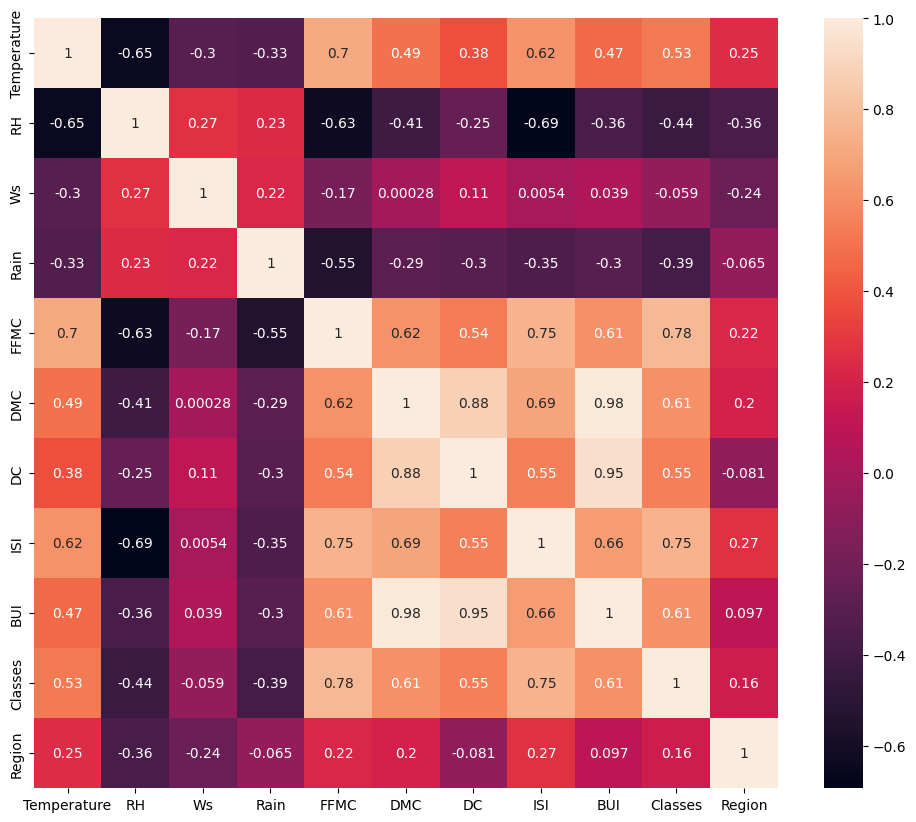

In [44]:
## Check for multicollinearity

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [45]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in  range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [46]:
## Threshold - Domain Expert should set this threshold
correlation(X_train, 0.85)

{'BUI', 'DC'}

In [47]:
## Drop the highly correlated features when correlation is greater than 0.85
X_train = X_train.drop(columns=correlation(X_train, 0.85), axis = 1)
X_test = X_test.drop(columns=correlation(X_test, 0.85), axis = 1)

X_train.shape, X_test.shape


((181, 9), (61, 9))

In [48]:
## Feture scalling - Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

Text(0.5, 1.0, 'X-train After Scaling')

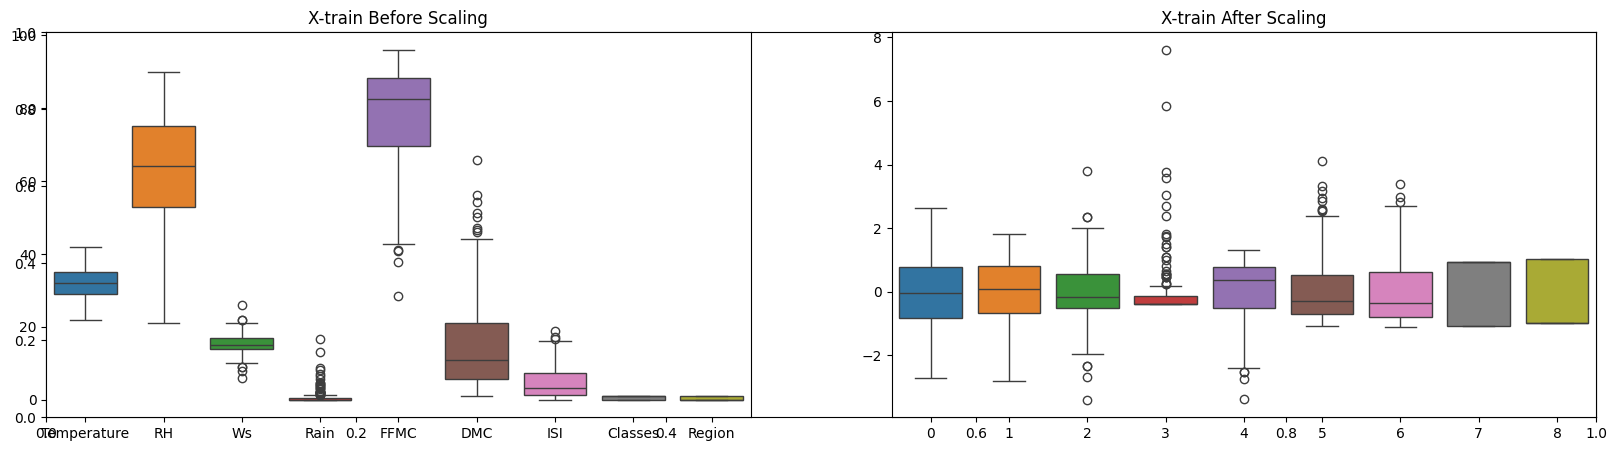

In [50]:
## Box plots to understand the effect of standard scaler

plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X-train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X-train After Scaling')

Mean Absolute Error: 0.5838063599546968
R2 Score: 0.983523052949508


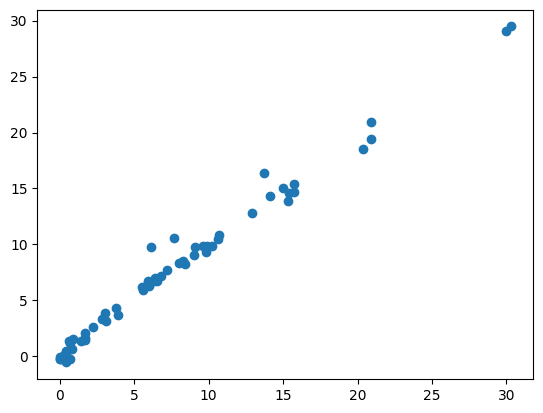

In [51]:
## Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R2 Score:', score)   

plt.scatter(y_test, y_pred)

Mean Absolute Error: 1.1459979969391692
R2 Score: 0.9497712193501187


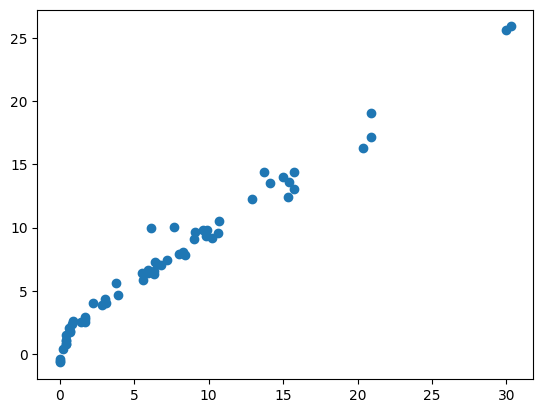

In [52]:
## Lasso Regression

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R2 Score:', score)

plt.scatter(y_test, y_pred)

Mean Absolute Error: 0.6125515638101009
R2 Score: 0.982698355229298


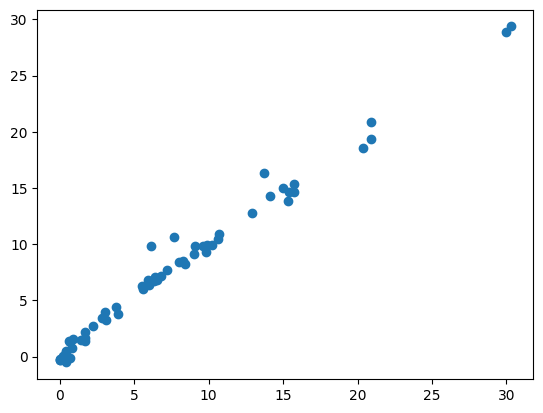

In [53]:
## Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R2 Score:', score)

plt.scatter(y_test, y_pred)

Mean Absolute Error: 1.8915134363047037
R2 Score: 0.8731354681001339


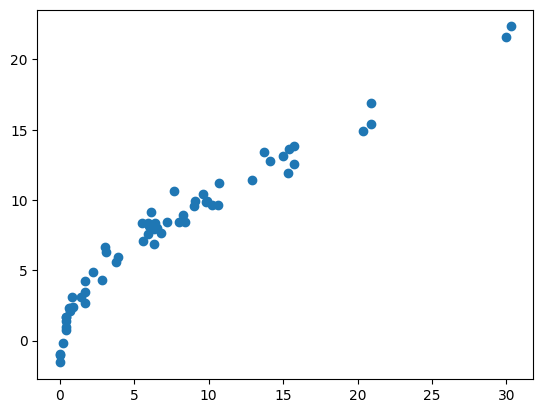

In [54]:
## Elasticnet Regression

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)

y_pred = elasticnet.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R2 Score:', score)

plt.scatter(y_test, y_pred)

#### Cross Validation

In [55]:
## Cross Validataion using LassoCV
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [56]:
lassocv.alphas_

array([6.94947533, 6.48110395, 6.04429924, 5.6369337 , 5.25702323,
       4.90271746, 4.57229071, 4.26413362, 3.97674529, 3.70872596,
       3.45877025, 3.22566071, 3.00826197, 2.80551518, 2.61643285,
       2.44009403, 2.27563986, 2.12226935, 1.9792355 , 1.84584165,
       1.7214381 , 1.60541894, 1.49721907, 1.39631152, 1.3022048 ,
       1.21444055, 1.13259132, 1.05625846, 0.98507017, 0.91867974,
       0.8567638 , 0.79902079, 0.74516946, 0.69494753, 0.6481104 ,
       0.60442992, 0.56369337, 0.52570232, 0.49027175, 0.45722907,
       0.42641336, 0.39767453, 0.3708726 , 0.34587702, 0.32256607,
       0.3008262 , 0.28055152, 0.26164329, 0.2440094 , 0.22756399,
       0.21222694, 0.19792355, 0.18458417, 0.17214381, 0.16054189,
       0.14972191, 0.13963115, 0.13022048, 0.12144406, 0.11325913,
       0.10562585, 0.09850702, 0.09186797, 0.08567638, 0.07990208,
       0.07451695, 0.06949475, 0.06481104, 0.06044299, 0.05636934,
       0.05257023, 0.04902717, 0.04572291, 0.04264134, 0.03976

In [57]:
lassocv.mse_path_

array([[54.83966454, 59.07855795, 38.72729712, 78.24916791, 53.00661707],
       [48.33127443, 52.98238939, 33.40705056, 76.17370919, 47.37592787],
       [42.489492  , 46.9476325 , 28.61641869, 69.11179183, 42.46600092],
       [37.38816074, 41.6222327 , 24.54198449, 62.88571919, 38.18380814],
       [32.93231013, 36.95463498, 21.08421335, 57.39228141, 33.53847098],
       [29.03908563, 32.86149181, 18.15701813, 52.54133041, 29.14966015],
       [25.63631212, 29.27011099, 15.68586523, 48.25410422, 25.34331445],
       [22.66140204, 26.11749884, 13.60632992, 43.16468118, 22.0425561 ],
       [20.05957707, 23.34834079, 11.86266757, 37.9874641 , 19.18168383],
       [17.78321296, 20.91452315, 10.40680285, 33.46741145, 16.70233718],
       [15.79082322, 18.77407566,  9.19714128, 29.52048402, 14.5542223 ],
       [14.0461701 , 16.89025254,  8.19780164, 26.07233474, 12.69363691],
       [12.51796119, 15.23137028,  7.37783328, 23.06047803, 11.08260866],
       [11.17864417, 13.76938633,  6.7

0.9808648686248684

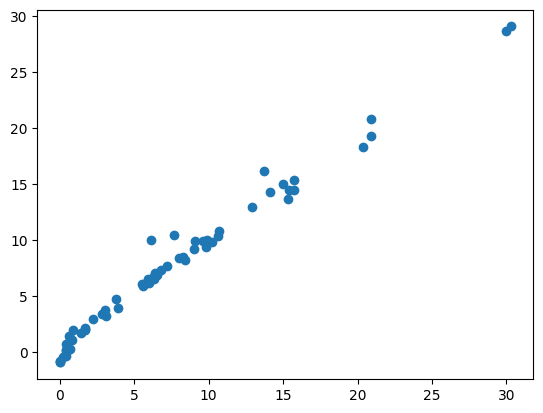

In [58]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
r2_score(y_test, y_pred)

0.9808648686248684

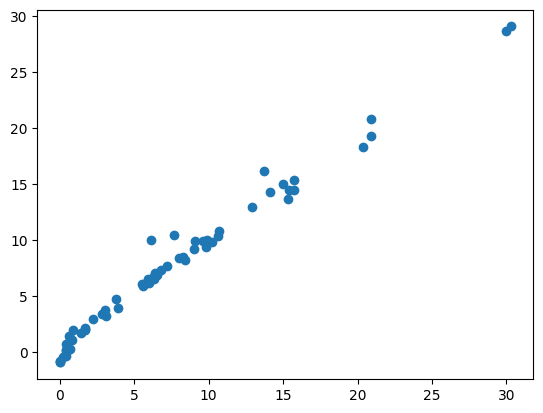

In [59]:
## Cross Validataion using RidgeCV

from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)

ypred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
r2_score(y_test, y_pred)

0.9789324233433637

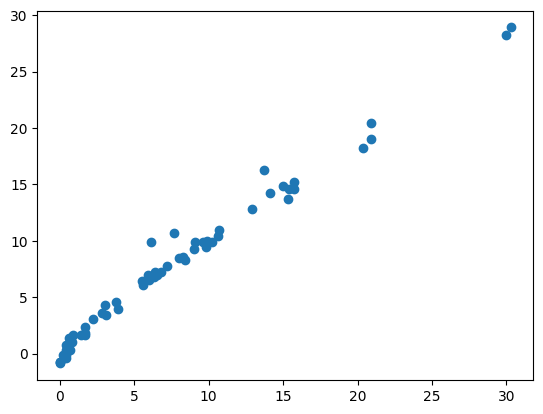

In [60]:
## Cross validation with ElasticNetCV
 
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)

elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
r2_score(y_test, y_pred)


In [61]:
## Pickle the machine learning models, preprocessing model for scaler

import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))


In [63]:
new_prediction_data = [[29,57,18,0,65.7,3.4,0.3,1,0]]

scaled_new_data = scaler.transform(new_prediction_data)

prediction = ridge.predict(scaled_new_data)

print(prediction)


[0.63161873]


/Users/murtuzasaifee/Documents/Personal/Codes/python_ml_nlp/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
